In [1]:
# Import useful libraries
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import scipy.stats

Suppose that each day, the number of customers at Fusion (supermarket on LG7) follows a Poisson distribution at a rate of 100 customers per day. Assume that the number of customers at Fusion on each day is independent from each other. Let $S_n$ be the total number of customers at Fusion in $n$ days. Assume $S_0=0$. It turns out that $S_n$ is a sum process. The function below simulates the sum process for multiple trials. In the returned array, each column corresponds to one trial of sum process and each row corresponds to one day.

In [2]:
def sum_process(ntrial, ntime, mu):
    '''Generate ntrails sum processes that last for ntime days'''
    X = scipy.stats.poisson.rvs(mu,size=[ntime+1,ntrial])
    X[0] = np.zeros(ntrial)
    S_n = np.cumsum(X,axis=0)
    return S_n

In the following, we generate and plot 5 sum processes over 20 days. The number of customers at Fusion follows a Poisson distribution at a rate of 100 customers per day.

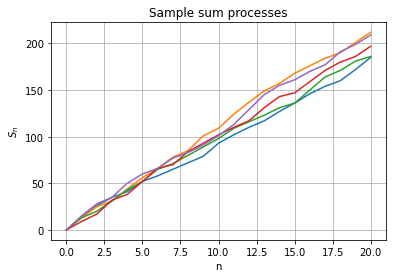

In [3]:
# generate 5 sum processes 
ntrial = 5
ntime = 20
mu = 10
sample_Sn = sum_process(ntrial, ntime, mu)

# plot of sum processes
n = range(0, ntime+1)
plt.plot(n, sample_Sn)
plt.xlabel('n')
plt.ylabel('$S_n$')
plt.title('Sample sum processes')
plt.grid()
plt.show()

In the following, we generate many sum processes. We pick out the sum processes at time $n_1=30$ and plot the empirical histogram of $S_{n_1}$ over all trials for bins of width 20 customers ranging from 2800 to 3200.

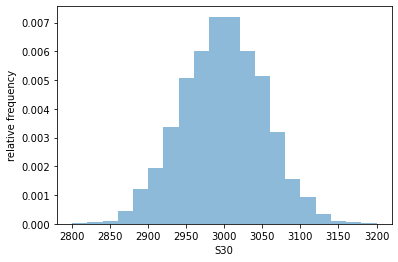

In [4]:
# generate 2000 sum processes running over 1000 days
ntrial = 2000
ntime = 1000
mu = 100
S_n = sum_process(ntrial, ntime, mu)

# pick out the sum processes at a particular time n1=10
n1 = 30
samples1 = S_n[n1]
edges = np.arange(2800,3220,20)
fig, ax = plt.subplots()
ax.hist(samples1, bins=edges, density=True, alpha=0.5)

# label plot
ax.set_xlabel(f'S{n1}')
ax.set_ylabel('relative frequency')
plt.show()

**Part a:** Since $S_n$ is obtained by taking the sum of all the requests from time 0 up to time $n$, by the central limit theorem, for large $n$, the distribution of $S_n$ is approximately Gaussian. It also turns out that for this particular situation, the exact distribution is Poisson with mean paramter equal to the theoretical mean. By thinking about the properties of the Poisson process, you should be able see why this is the case. 

(1) Compute the theoretical mean (tmean) and standard deviation (tstd) of $S_n$ at time n1 = 30. 

(2) Compute the empirical mean (emean) and standard deviation (estd) of $S_n$ at time n1 = 30. 

(3) Create a single plot containing the folllowing:
- the empirical histogram with bins of size 20 from 2800 to 3200.
- the approximating (Gaussian) pdf
- the exact Poisson pmf

the theoretical mean is:  3000
the theoretical std is:  54.772255750516614
the empirical mean is:  2997.92
the empirical std is:  54.22251008575682


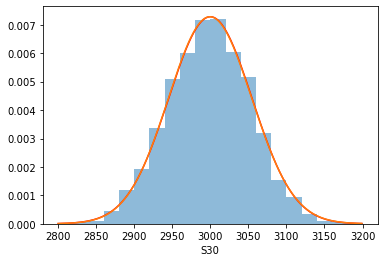

In [5]:
# put your code here
tmean = 30*100
tstd = 30**(1/2)*10
emean = np.mean(samples1)
estd = np.std(samples1)

print("the theoretical mean is: ", tmean)
print("the theoretical std is: ", tstd)
print("the empirical mean is: ", emean)
print("the empirical std is: ", estd)
edges = np.arange(2800,3220,20)
fig, ax = plt.subplots()
ax.hist(samples1, bins=edges, density=True, alpha=0.5)
x = np. arange(2800, 3200)
f = scipy.stats.norm.pdf(x, loc = tmean, scale = tstd)
p = scipy.stats.poisson.pmf(x,tmean)
ax.plot(x, f, 'r')
ax.plot(x, p)

# label plot
ax.set_xlabel(f'S{n1}')
plt.show()

**Part b:** In a random process, the mean and standard deviation (or variance) can change over time.

(1) Compute the theoretical mean (tmean) and standard deviation (tstd) of $S_n$ at time n2 = 300. 

(2) Compute the empirical mean (emean) and standard deviation (estd) of $S_n$ at time n2 = 300. 

(3) Create a single plot containing the following:
- the empirical histogram with bins of size 50 from 28000 to 32000.
- the approximating (Gaussian) pdf
- the exact Poisson pmf

the theoretical mean is:  30000
the theoretical std is:  173.20508075688775
the empirical mean is:  30001.406
the empirical std is:  175.26134817466172


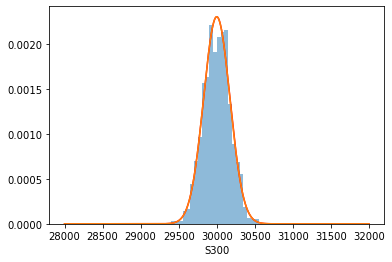

In [6]:
# put your code here
# generate 2000 sum processes running over 1000 days
ntrial = 2000
ntime = 1000
mu = 100
S_n = sum_process(ntrial, ntime, mu)

# pick out the sum processes at a particular time n1=10
n2 = 300
samples2 = S_n[n2]

tmean = 300*100
tstd = 300**(1/2)*10
emean = np.mean(samples2)
estd = np.std(samples2)

print("the theoretical mean is: ", tmean)
print("the theoretical std is: ", tstd)
print("the empirical mean is: ", emean)
print("the empirical std is: ", estd)
edges = np.arange(28000,32000,50)
fig, ax = plt.subplots()
ax.hist(samples2, bins=edges, density=True, alpha=0.5)
x = np. arange(28000, 32000)
f = scipy.stats.norm.pdf(x, loc = tmean, scale = tstd)
p = scipy.stats.poisson.pmf(x,tmean)
ax.plot(x, f ,'r')
ax.plot(x, p)

# label plot
ax.set_xlabel(f'S{n2}')
plt.show()

**Part c:** Describe the difference between the distributions at times 30 and 300. What do you expect to see for the distribution at time 150?

**Part c answer:**  Difference: means and stds become bigger between 30 and 300. What's more, the mean goes linearly. At time 150, the mean and the std should be in between 30 and 300.

**Part d:** Is $S_n$ a wide-sense stationary process? Justify your answer. 

**Part d answer:** Sn is not a wide-sense stationary process, since it is not a constant.

**Part e** The correlation between values of the random process at different points in time differs according to the time samples chosen.  Visualize this by plotting
* A 2D scatter plot of the values of $S_n$ at time 35 and 40
* A 2D scatter plot of the values of $S_n$ at time 35 and 300

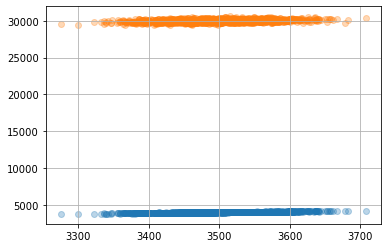

In [7]:
# put your code here
n3 = 35
samples3 = S_n[n3]
n4 = 40
samples4 = S_n[n4]
plt.grid()
plt.scatter(samples3,samples4,alpha=0.3)
plt.scatter(samples3,samples2,alpha=0.3)

**Part f** Compute the theoretical value of the correlation coefficient between $S_{35}$ and $S_{40}$, as well the correlation coefficient between $S_{35}$ and $S_{300}$. Compare this with the empirical estimate from the data.

In [8]:
# put your code here
trho_1 = 100*35/((35**(1/2)*10) * (40**(1/2)*10))
trho_2 = 100*35/((35**(1/2)*10) * (300**(1/2)*10))
print ("the theoretical value of the correlation coefficient between S35 and S40 is: ", trho_1)
print ("the theoretical value of the correlation coefficient between S35 and S300 is: ", trho_2)
erho_1 = np.corrcoef(samples3,samples4)
erho_2 = np.corrcoef(samples3,samples2)
print("the empirical value of the correlation coefficient between S35 and S40 is: ", erho_1[0][1])
print("the empirical value of the correlation coefficient between S35 and S300 is: ", erho_2[0][1])

the theoretical value of the correlation coefficient between S35 and S40 is:  0.9354143466934853
the theoretical value of the correlation coefficient between S35 and S300 is:  0.34156502553198653
the empirical value of the correlation coefficient between S35 and S40 is:  0.9361946154366542
the empirical value of the correlation coefficient between S35 and S300 is:  0.3486798211313643


**Part g** Compare the correlation coefficients calculated for times (35,40) and times (35,300). How are the differences in the correlation coefficients reflected in the differences in the scatter plots?

**Part g answer:**  the correlation coefficients for times (35,40) is more closer to 1 than times (35,300). It reflects that Sn and Sm are less related to each other when |n - m| becomes larger.